In [ ]:
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape),print(y_train.shape),print(x_test.shape),print(y_test.shape)  ### 10,000 images with size 28x28

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(None, None, None, None)

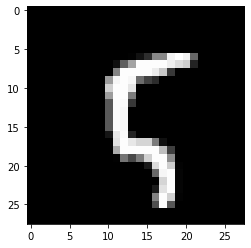

In [ ]:
from matplotlib import image
image_index= 100
plt.imshow(x_train[image_index],cmap='gray')
plt.show()

In [ ]:
### Reshaping the Dataset
### Keras input format ( number of images, rows, columns, dimension of the image)
x_train = x_train.reshape(x_train.shape[0],28,28,1)  ### 1 in-case of grey scale image and 3 in case of RGB image
x_test = x_test.reshape(x_test.shape[0],28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
### Data Scaling and normalization
"""
Done to make the algorithm run faster.
Subtracting the values to distribute the values uniformly around 0
"""

### Explicitly converting the values to float so that we can get decimal points after division

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

### Normalizing the RGB codes by dividing it to the max RGB value
x_train /= 255- 0.5
x_test /= 255- 0.5

In [ ]:
### Creating a Sequential model for CNN in keras

num_filters = 8
filter_size =  3   ### 3x3 dimension filter
pool_size = 2   ### Pooling filter for maxpool layer is of size 2


model = Sequential()
model.add(Conv2D(num_filters,filter_size,strides=(1,1),input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1352)              0         
                                                                 
 dense (Dense)               (None, 10)                13530     
                                                                 
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 8) dtype=float32, numpy=
 array([[[[-0.17683358, -0.0561948 , -0.23134963, -0.01160246,
            0.12374613,  0.18162286,  0.03738001,  0.02593684]],
 
         [[-0.07493666, -0.19840688, -0.10965386, -0.21706355,
           -0.17577583,  0.04967731,  0.00743669,  0.2605083 ]],
 
         [[ 0.12313941,  0.10558212, -0.26298714,  0.2578575 ,
            0.11191773,  0.17649546,  0.09815827, -0.17808133]]],
 
 
        [[[ 0.004897  , -0.12413645, -0.02182099, -0.24283323,
            0.10958061, -0.17114617, -0.02307957, -0.20770046]],
 
         [[ 0.02434745, -0.26625717,  0.11623424,  0.02349013,
           -0.07200223, -0.19264692, -0.23028195, -0.18380173]],
 
         [[-0.05475731, -0.03762996,  0.18388629, -0.05427629,
           -0.24776831, -0.08732429, -0.15093464,  0.20363021]]],
 
 
        [[[ 0.11306894,  0.11915749, -0.06266543,  0.04550499,
           -0.17866263,  0.1422222 ,  0.13644665,  0.0322696 ]],
 
         [[

In [ ]:
## compiling the model
model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])
## Training the model
model.fit(x_train,to_categorical(y_train),epochs = 3,verbose=1,validation_data=(x_test,to_categorical(y_test)),)

Epoch 1/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3685 - accuracy: 0.8949 - val_loss: 0.2355 - val_accuracy: 0.9320
Epoch 2/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2206 - accuracy: 0.9372 - val_loss: 0.1826 - val_accuracy: 0.9489
Epoch 3/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1622 - accuracy: 0.9549 - val_loss: 0.1385 - val_accuracy: 0.9603


In [ ]:
score = model.evaluate(x_test,to_categorical(y_test),verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:',score[1])

Test Loss: 0.13846024870872498
Test Accuracy: 0.9603000283241272


In [ ]:
### Predicting the first 5 images
predictions = model.predict(x_test[:5])

In [ ]:
### Printing the models output, here we will be printing the max values of the 
print(np.argmax(predictions,axis=1)) ### Index Values for the Predected Image
print(y_test[:5]) ### ### Index Values for the Actual Image

[7 2 1 0 4]
[7 2 1 0 4]
